In [1]:
from params import FuzzyInputVariable_3Trapezoids, FuzzyInputVariable_2Trapezoids, FuzzyInputVariable_List_Trapezoids
from operators import productN
import numpy as np
#from helps_and_enhancers import *
import matplotlib.pyplot as plt
from geneticANFIS import ANFIS
import time
import copy
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


<H1>Genetyczny<H1>

<H1>Przygotowanie zbioru danych: XOR<H1>

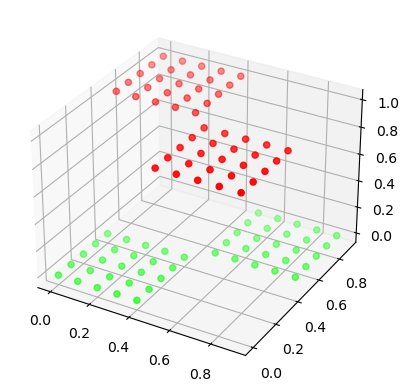

In [2]:
x = np.arange(0, 1, 0.1)
x,y = np.meshgrid(x, x)

dataX = x.flatten()
dataY = y.flatten()
dataXY1 = np.column_stack((dataX,dataY,np.ones(len(dataX))))
dataXY = np.column_stack((dataX,dataY))

data_labels = np.logical_xor(dataX >= 0.5, dataY >= 0.5) 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

rgb = [[1,0,0] if cc else [0,1,0] for cc in data_labels]

ax.scatter(dataX, dataY, data_labels, c=rgb)

plt.show()

<H1>Utworzenie funkcji przynależności</H1>

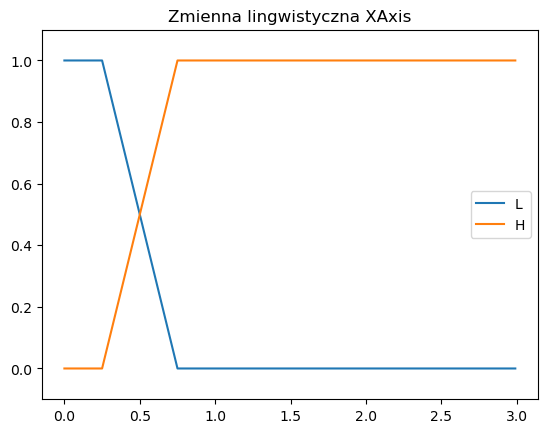

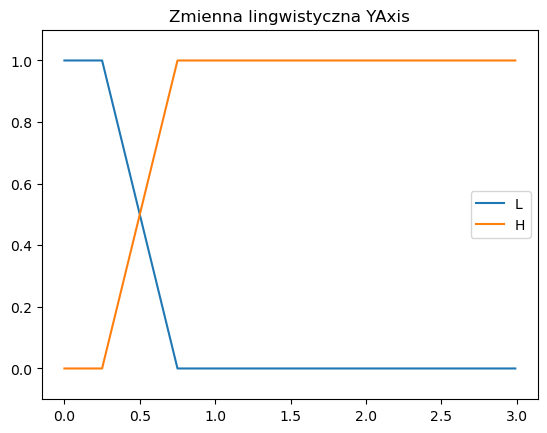

In [13]:
varX = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "XAxis", ["L","H"]) # low, high
varY = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "YAxis", ["L","H"])

#mf1 = [[-0.5, 0.25, 0.25, 0.25], [0.5, 0.25, 0.1, 0.1]]
#varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", ["L","H"])
#varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", ["L","H"])

#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

<H1>Inicjalizacja systemu ANFIS</H1>

Parametry początkowe:
Przesłanki:  [[0.5, 0.5], [0.5, 0.5]] 
Konkluzje:  [[0.04153709 0.52334823 0.04939721]
 [0.37849498 0.62858303 0.82490027]
 [0.57227572 0.50487247 0.35028091]
 [0.87094093 0.06727345 0.75615371]]


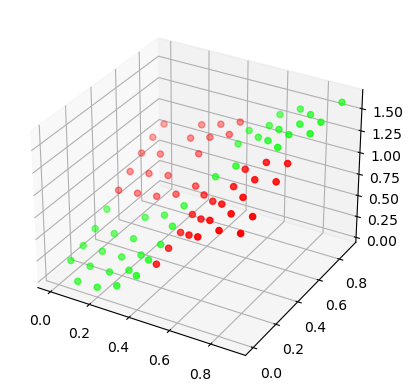

In [14]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train)

print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

fis.show_results()

<H1>Uczenie systemu ANFIS</H1>

Current best fitness: 3.0800: 100%|██████████| 500/500 [00:45<00:00, 10.99it/s]        


Optymalizacja zakończona!
z blędem:   3.0800360742933335
Liczba it:  500
TIME elapsed:  46.83441877365112


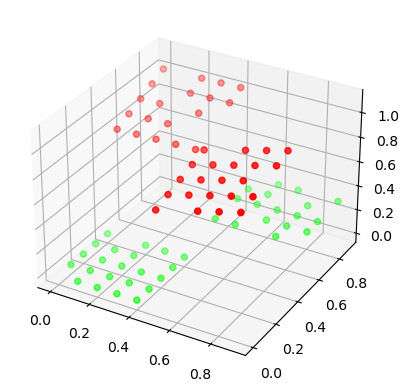

In [15]:
start = time.time()
fis.train(True, True, False, True, n_iter=500, float_divisions=7500000000)
end = time.time()
print("TIME elapsed: ", end - start)
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

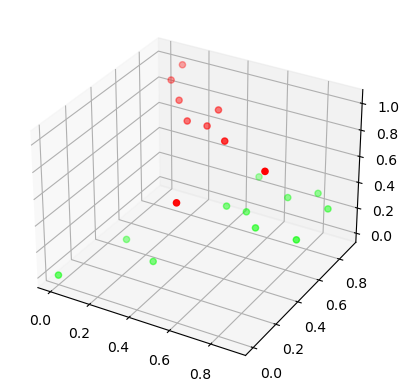

In [16]:
fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
# print(confusion_matrix(y_test, y_pred))

In [17]:
print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

Parametry początkowe:
Przesłanki:  [[0.43221569 0.02857201]
 [0.42619558 0.01662589]] 
Konkluzje:  [[0.00510524 0.00122557 0.00234219]
 [0.43310022 0.37243471 0.56318651]
 [0.03178076 0.50140354 0.54577712]
 [0.00322875 0.00370741 0.28643289]]


<H1>Sprawdzanie parametrów jakich nauczył się system</H1>

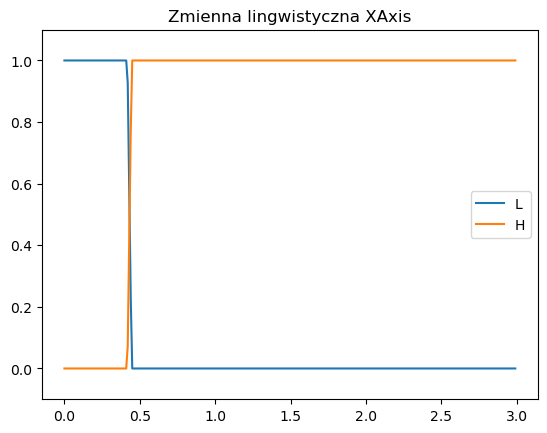

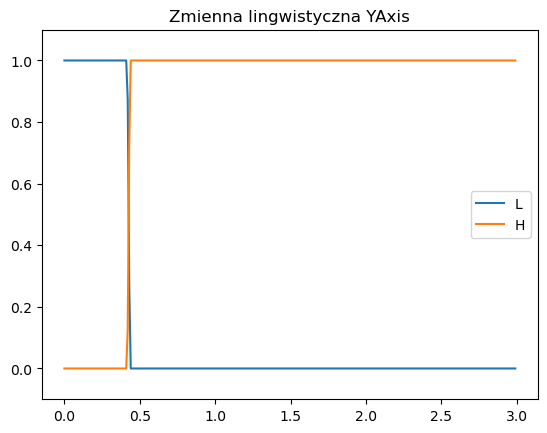

In [18]:
#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

In [19]:
print("Parametry końcowe:\nPrzesłanki: ", repr(fis.premises), "\nKonkluzje: ", repr(fis.tsk))

Parametry końcowe:
Przesłanki:  array([[0.43221569, 0.02857201],
       [0.42619558, 0.01662589]]) 
Konkluzje:  array([[0.00510524, 0.00122557, 0.00234219],
       [0.43310022, 0.37243471, 0.56318651],
       [0.03178076, 0.50140354, 0.54577712],
       [0.00322875, 0.00370741, 0.28643289]])


<H1>Sprawdzanie wpływu parametrów na wyniki systemu</H1>

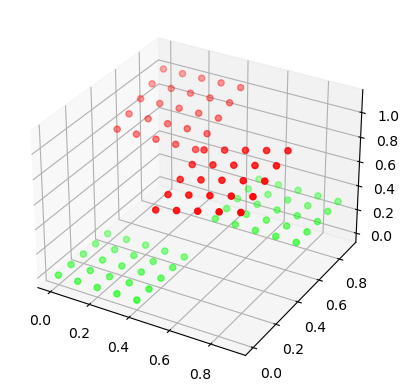

In [20]:
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

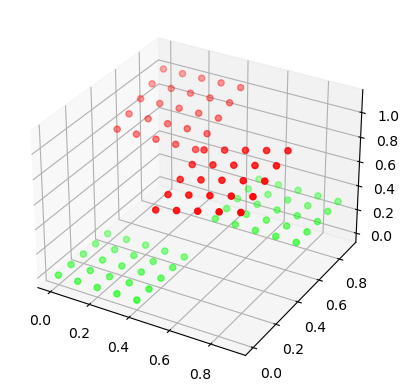

In [21]:
# fis.premises = ##################
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

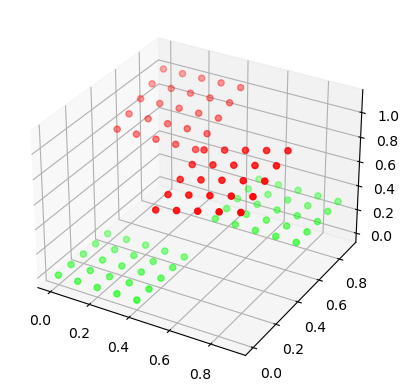

In [22]:
# fis.tsk = ##################
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

<H1>Zadanie</H1>

Naucz system ANFIS tabliczki mnożenia. Zacznij od rozmiaru 2x2 i zwiększaj w obu kierunkach z krokiem 1 (kolejno 2x2, 3x3, 4x4, 5x5). Mierz czas jaki jest potrzebny na nauczenie systemu w zależności od wymiarów tabliczki. Zrób wykres wymiaru tabliczki od czasu uczenia i wyślij wraz ze swoim komentarzem na maila iperenc@kis.p.lodz.pl. Nie musisz dojść do rozmiaru 10x10, wystarczy 5x5, ważne żeby było widać jaka jest zależność.

In [23]:
%matplotlib auto

Using matplotlib backend: <object object at 0x00000146CE0064C0>


In [24]:
%matplotlib inline

In [28]:
def train_multiplication_table(n=2):
    x = np.arange(1, n, 0.1)
    x,y = np.meshgrid(x, x)

    dataX = x.flatten()
    dataY = y.flatten()
    dataXY = np.column_stack((dataX,dataY))

    data_labels = np.multiply(np.round(dataX), np.round(dataY))

    mf1 = [[n+1, 0.25, 0.5, 0.5] for n in range(n)]
    labels = [str(n+1) for n in range(n)]
    varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", labels)
    varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", labels)

    X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2)

    fis = ANFIS([varX, varY], X_train.T, y_train)

    start = time.time()
    result = fis.train(True, True, False, True, n_iter=500, float_divisions=750000000)
    end = time.time()
    elapsed = end - start
    print("TIME elapsed: ", elapsed)

    fis.training_data = dataXY.T
    fis.expected_labels = data_labels
    fis.show_results()
    print("Parametry koncowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

    return result, elapsed

Current best fitness: 40.4465: 100%|██████████| 500/500 [00:53<00:00,  9.32it/s]       

Optymalizacja zakończona!
z blędem:   40.44646966864393
Liczba it:  500
TIME elapsed:  56.11318016052246


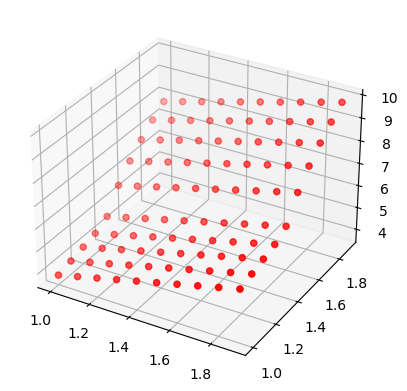

Parametry koncowe:
Przesłanki:  [[[1.5616354  4.76385647 5.0111282  3.52028295]
  [3.81866162 1.13809915 1.02651255 0.22786803]]

 [[4.61059016 2.70456287 2.27808454 3.79958341]
  [4.85411546 1.00226542 2.96660713 2.6596392 ]]] 
Konkluzje:  [[2.14394418 1.61119739 0.07690204]
 [5.66783594 4.79467014 3.0642628 ]
 [2.52807213 5.35952375 0.81105308]
 [1.64224116 3.29986389 3.50263381]]


Current best fitness: 1573.2681: 100%|██████████| 500/500 [01:15<00:00,  6.61it/s]     


Optymalizacja zakończona!
z blędem:   1573.2681143524446
Liczba it:  500
TIME elapsed:  79.88678574562073


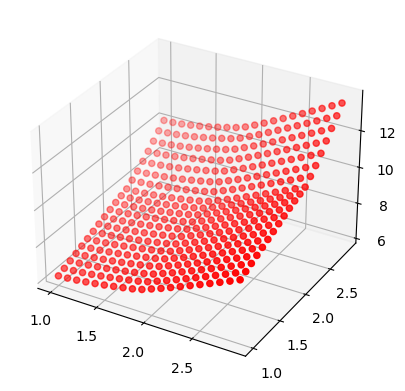

Parametry koncowe:
Przesłanki:  [[[1.8119465  3.72012561 5.20774153 1.95750561]
  [5.67146887 5.50622096 5.46556936 5.33437025]
  [1.97811336 0.22063587 0.93763891 5.63488868]]

 [[5.16415827 1.23347431 2.3515187  1.14685115]
  [1.29079308 2.18744215 1.16385791 2.55209697]
  [3.01526142 2.10745708 5.1563805  4.00664072]]] 
Konkluzje:  [[0.48538361 2.49737478 1.92737138]
 [4.59157793 5.48494588 5.69364474]
 [5.45078164 1.61335179 2.94687414]
 [0.16359483 0.8115939  3.64976478]
 [1.58972283 0.40922423 3.25686989]
 [0.60688671 1.38901065 0.45607859]
 [1.48053428 2.7156543  2.1239967 ]
 [5.57063776 0.51472712 5.14680794]
 [1.95058855 0.45644782 2.65524978]]


Current best fitness: 4106.4263: 100%|██████████| 500/500 [01:50<00:00,  4.52it/s]     

Optymalizacja zakończona!
z blędem:   4106.426312049289
Liczba it:  500
TIME elapsed:  117.32071280479431


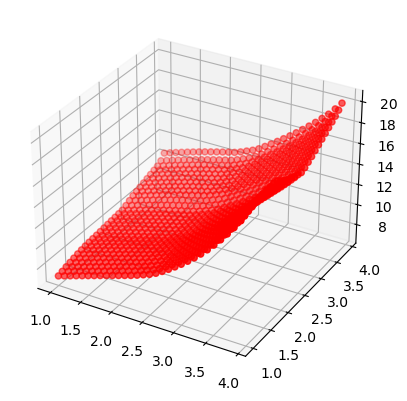

Parametry koncowe:
Przesłanki:  [[[1.12004904 2.86290779 5.01881579 1.3889157 ]
  [4.69334371 2.03396665 5.70225628 1.6405994 ]
  [5.62989751 0.22690487 3.27945398 2.01970989]
  [0.20545789 1.16189551 5.30700581 2.93355715]]

 [[0.95675345 5.57734637 4.92656995 1.96194691]
  [5.46773054 0.3382419  1.53035593 2.27549017]
  [3.37012273 0.74114023 1.02722135 5.70268216]
  [0.74764873 0.03498415 2.86038987 1.9540914 ]]] 
Konkluzje:  [[0.18543013 0.15061364 4.71805854]
 [3.12352003 0.78067878 0.35403572]
 [2.74621659 3.99292278 1.90829025]
 [2.63598032 2.23951965 1.91246287]
 [0.47334656 3.80071672 1.17118798]
 [1.01465867 5.34456401 2.2474174 ]
 [2.58645997 1.32991044 1.79488865]
 [3.56462008 4.18128727 2.02436073]
 [1.79445213 0.86700273 3.0078361 ]
 [0.98009319 2.84192887 5.55760909]
 [0.14981052 4.52475349 2.15570938]
 [4.247006   1.81095322 0.17650332]
 [0.48202282 4.27481269 2.73201789]
 [3.96409423 3.09048119 4.76494556]
 [3.84153043 2.43488309 1.36657963]
 [3.29227876 0.61275786 4.6

Current best fitness: 9074.5931: 100%|██████████| 500/500 [03:21<00:00,  2.49it/s]     

Optymalizacja zakończona!
z blędem:   9074.593097338568
Liczba it:  500
TIME elapsed:  210.66697812080383


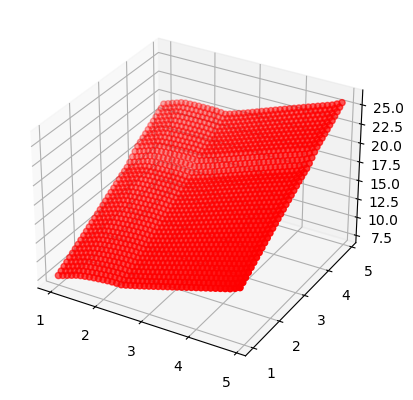

Parametry koncowe:
Przesłanki:  [[[1.1395672  1.905804   5.35807169 5.36262454]
  [2.10594509 5.23750395 0.73451891 1.34346722]
  [2.9076063  4.93492215 2.16022711 1.29006125]
  [2.38309049 0.89003129 3.70396737 4.59259991]
  [0.60119633 1.65022356 3.00868461 0.98306657]]

 [[1.00438304 5.02277676 4.74900179 5.22704584]
  [5.2265603  2.70974931 0.32989151 2.48253867]
  [2.55189426 2.38702585 3.54468726 5.10435916]
  [2.04407047 4.90879749 3.92221976 5.03567096]
  [4.96530313 3.40358225 2.28737723 1.26782716]]] 
Konkluzje:  [[0.38385543 0.72505141 2.01149157]
 [0.02864374 1.99179714 2.6624477 ]
 [4.26438314 5.70394595 4.50793051]
 [0.47655904 0.86604201 3.18317187]
 [3.04359518 0.50752149 3.24700539]
 [2.16971253 2.33572909 3.47504278]
 [3.04235149 2.86793203 0.26582936]
 [0.15193412 4.36379525 5.22100008]
 [1.94495202 5.03718418 0.77888046]
 [2.2239659  4.02572477 2.48869599]
 [4.06175477 4.84428329 4.55349696]
 [1.34326487 2.99594366 0.41852657]
 [0.83380052 1.29243153 1.42621122]
 [3

In [29]:
times = [train_multiplication_table(n) for n in range(2, 6)]

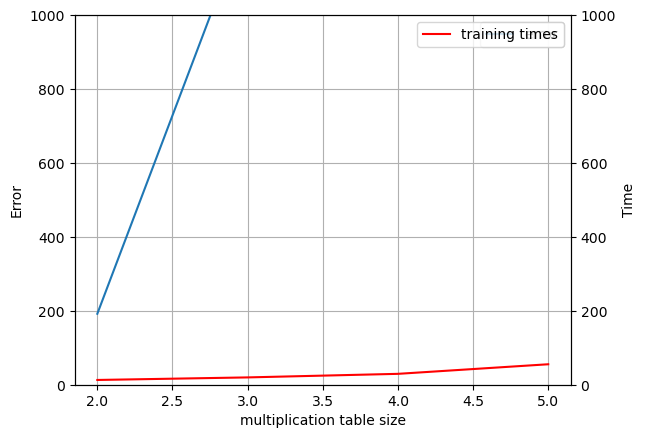

In [17]:
fig = plt.figure()
x = np.arange(2, 6, 1)
# Plotting dataset_2
ax = fig.add_subplot(111)
errors = [t[0] for t in times]
times = [t[1] for t in times]

ax.plot(x, errors, '-', label='error')

# Creating Twin axes for dataset_1
ax2 = ax.twinx()
ax2.plot(x, times, '-r', label='training times')

ax.legend(loc=0)
ax2.legend(loc=0)

ax.grid()

ax.set_xlabel("multiplication table size")
ax.set_ylabel(r"Error")
ax2.set_ylabel(r"Time")

# Setting Y limits
ax.set_ylim(0, 1000)
ax2.set_ylim(0, 1000)

# Show plot
plt.show()


In [18]:
times

[12.866999626159668, 19.79249930381775, 29.435485363006592, 55.3589973449707]

In [19]:
errors

[192.0, 1265.0, 4440.0, 11403.0]